In [1]:
from matplotlib import pyplot as plt
import numpy as np
from read_rosbag import yaml2dict

In [2]:
messages = yaml2dict("0_0_0_0.bag.yaml")
messages_pf = yaml2dict("pf_0_0_0_0.bag.yaml")

In [3]:
i = 0
j = 0
trajectory    = []
trajectory_pf = []
while i < len(messages) and j < len(messages_pf):
    if messages[i]["header"] is None:
        i += 1
        continue
    if messages_pf[j] is None or messages_pf[j]["header"] is None:
        j += 1
        continue
    if messages[i]["header"]["seq"] < messages_pf[j]["header"]["seq"]:
        i += 1
    elif messages[i]["header"]["seq"] > messages_pf[j]["header"]["seq"]:
        j += 1
    else:
        trajectory.append([messages[i]["pose"]["x"], messages[i]["pose"]["y"]])
        trajectory_pf.append([messages_pf[i]["pose"]["x"], messages_pf[i]["pose"]["y"]])
        i += 1; j += 1
trajectory    = np.array(trajectory)
trajectory_pf = np.array(trajectory_pf)

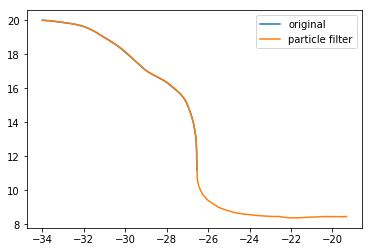

In [4]:
# two lines overlap
plt.plot(trajectory[:,0], trajectory[:,1], label="original")
plt.plot(trajectory_pf[:,0], trajectory_pf[:,1], label="particle filter")
plt.legend()
plt.show()